## Importamos las librerias a utilizar 

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
classes = ['alpaca', 'llama', 'vicuna', 'camello', 'dromedario']
path_data = '../data/interim'

#### Cambiamos los nombres a los archivos de cada carpeta 

import os

for c in classes:
    path = os.path.join('../data/interim/', c)
    i = 0
    for file_name in os.listdir(path):
        dst = '{}/{}_{}.jpg'.format(path, c, str(i))
        src = '{}/{}'.format(path, file_name)
        os.rename(src, dst)
        i += 1

## View data

In [3]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path_data, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=2).normalize(imagenet_stats)

In [4]:
data.classes

['alpaca', 'camello', 'dromedario', 'llama', 'vicuna']

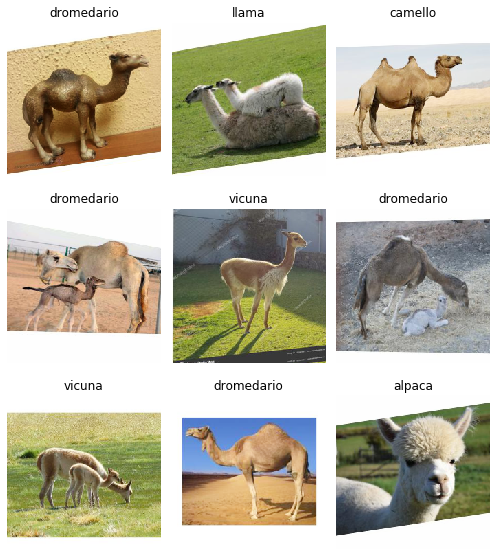

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['alpaca', 'camello', 'dromedario', 'llama', 'vicuna'], 5, 344, 86)

## Train data 

In [8]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/home/lezamora/Repositorios/.virtualenvs/camelid_classification/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.639245,0.794948,0.232558,01:27
1,1.116066,0.326304,0.093023,01:15
2,0.814268,0.300083,0.093023,01:21
3,0.648823,0.308857,0.104651,01:24


In [10]:
learn.save('stage-1', return_path=True)

PosixPath('../data/interim/models/stage-1.pth')

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


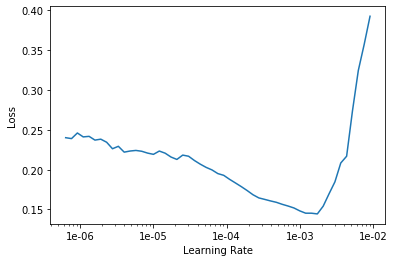

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.245432,0.301382,0.093023,01:30
1,0.190775,0.321895,0.116279,01:30


In [15]:
learn.save('stage-2', return_path=True)

PosixPath('../data/interim/models/stage-2.pth')

## Interpretation

In [16]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (344 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
vicuna,vicuna,vicuna,vicuna,vicuna
Path: ../data/interim;

Valid: LabelList (86 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
alpaca,vicuna,dromedario,vicuna,alpaca
Path: ../data/interim;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

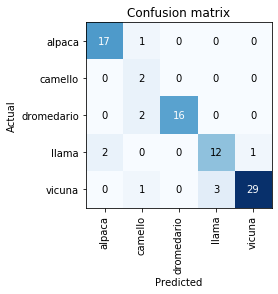

In [18]:
interp.plot_confusion_matrix()

## Putting your model in production

In [19]:
data.classes

['alpaca', 'camello', 'dromedario', 'llama', 'vicuna']

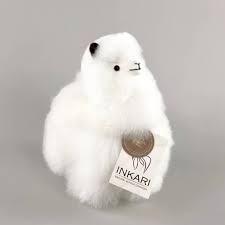

In [35]:
img = open_image(path_data +'/test/test_7.jpg')
img

In [26]:
# Exportamos el modelo para luego volver a utilizarlo
learn.export()

In [29]:
# Cargamos el modelo para luego predecir
learn = load_learner('../models')

In [36]:
# Predecimos alguna imagen para testear el modelo
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category alpaca